# Best Salary Recommendations
Syracuse Applied Data Science, IST-718 Big Data Analytics

Ryan Timbrook (RTIMBROO)  
7/20/2019  
Lab 1

## Objective
* Combine datasets to produce meaningful analysis. Specifically, we will provide a decision maker with more than just data - we provide insights, understanding, and wisdom.  


1. Obtain data and understand data structures and data elements.
2. Scrub data using scripting methods
3. Explore data using essential qualitative analysis techniques, including descriptive statistics.
4. Model relationships between data using the appropriate analytical methodologies matched to the information and the needs of clients and users.
5. Interpret the data, model, analysis, and findings, and communicate the results in a meaningful way.

# Instructions
* The research question is, **how can we recommend the best salary (total compensation, minus bonus) for our next head football coach?**
* Start with the data Coaches.
* Review the data-- clean as appropriate
* Consider the base worksheet and the additional data.
    * Stadium size
    * Graduation rate:
        * Available from: [NCAA Graduation Rates](http://fs.ncaa.org/Docs/newmedia/public/rates/index.html)
        * Use the 2006 or latest cohort and include both GSR and FGR
    * Annual donations to program (if available)
* Develop an additional vector for each school using last year's record.
* Build a data frame for your analysis.
* Conduct an initial data analysis.
* Fit a regression model with the salary as the response and the relevant predictors (more than one is needed...)


## Answer the following questions in your report:
* What is the recommended salary for the Syracuse football coach?
    * Recommended Salary:  
        * Current Syracuse Coach, TotalPay: \$2,401,206  
        * ACC:  
            * **Recommend Pay: $2,727,901**  
       
    * What would his salary be if we were still in the Big East? 
        * **Predicted Pay: $2,451,775**  

    * What if we went to the Big Ten?  
        * **Predicted Pay: $2,520,168**  
            * Currently Syracuse is in the Atlantic Coast Conference (ACC)  
            * The Big East is no longer a conference and not part of this dataset.  
                * A subset dataset could be considered based on the teams who belonged to that conference when Syracuse did.  


* What schools did we drop from our data, and why?  
    * Dropped Schools:  
        * No schools were dropped from the coaches dataset.  
        
        
* What effect does graduation rate have on the projected salary?  
    * GSR on Projected Salary:  
        * In the ACC Conference:  
            * Model 2: \$208  
            * Model 3: \$8,419  
        * In the Big Ten Conference:  
            * Model 2: \$4,196  
            * Model 3: \$-1,514  
        * In the Big East Conference:  
            * Model 2: \$2,051  
            * Model 3: \$6,871  
        * Overall of the coaches dataset:  
            * Model 2: \$6,398  
            * Model 3: \$8,956  


* How good is our model?
    * Overall Model 4 performed the best on each of the test scenarios.
        For all records:
            * M4: Proportion of Test Set Variance Accounted for: 0.485
            * M4: Most significant attribute: 'Score' with value: $67,279.0

        For the ACC Conference:
            * M4: Proportion of Test Set Variance Accounted for: 0.858
            * M4: Most significant attribute: 'WLRatio' with value: $214,497.0

        For the Big Ten Conference:
            * M4: Proportion of Test Set Variance Accounted for: 0.052
            * M4: Most significant attribute: 'WLRatio' with value: $73,876.0

        For the Big East Conference:
            * M4: Proportion of Test Set Variance Accounted for: 0.985
            * M4: Most significant attribute: 'Score' with value: $214,301.0
   *Inconsistencies in the model accuracy over the difference subdivisions is mostlikely due to unaccounted for outliers.  


* What is the single biggest impact on salary size?
    * Biggest Impact on Salary:
        * In the ACC Conference grouping, **'WLRatio' with a net increase of $214,497.**


Feature Set:  
    * Model 2: BonusPaid + StadSize + GSR + SeatRank + GSRank + W + L + WLRatio + OffenceScore + DefenseScore + Score + PointsPerGame  
    * Model 3: WLRatio + StadSize + SeatRank + GSR + GSRank + Score + PointsPerGame  
    * Model 4: Score + WLRatio + StadSize  
   
   
    Best feature Set Performance: Model 4  
        * Score + WLRatio + StadSize  
            * Best Feature:  
                * Score  
 

### Bonus:
* Develop a geographic visualization that in your view best depicts the conferences median salary.
* Fit a hierarchical model based on conference.
* Useing some additional materials - [APSPORTAL-ANALYTICS](https://apsportal.ibm.com/analytics) - recreate your code for the basic regression model with a training and test set, but do not use conference as a predictor

# Import packages for analysis and modeling

In [464]:
# import packages for analysis and modeling
import pandas as pd #data frame operations
import numpy as np #arrays and math functions
from scipy.stats import uniform #for training and test splits
from scipy.stats import gaussian_kde as kde # for resampling dataset
from scipy import stats #
import statsmodels.formula.api as smf #R-like model specification
import matplotlib.pyplot as plt #2D plotting
%matplotlib inline
import seaborn as sns #


In [565]:
# set global attributes
# Print output toggles
isDatasetExp = True

# Teams List
bigEastConf2012 = ['Cincinnati', 'Connecticut', 'Pittsburgh', 'Rutgers', 'South Florida','Syracuse','Louisville','Temple']
bigTenConf = ['Syracuse','Illinois', 'Minnesota','Northwestern','Purdue', 'Wisconsin','Michigan','Indiana','Iowa','Ohio State','Michigan State','Penn State', 'Nebraska','Maryland','Rutgers']
syracuseConf = 'ACC'

# Obtain the Coaches Dataset

In [4]:
# read in Coaches data and create data frame
coachesDf = pd.read_excel("./data/coaches_modify.xlsx")
# read in other data

if isDatasetExp: print(coachesDf.head(5))

              School      Conf              Coach  NCAAFBREV16  MedianConfSal  \
0          Air Force  Mt. West       Troy Calhoun   59577780.0       879288.0   
1              Akron       MAC       Terry Bowden   35331217.0       492413.0   
2            Alabama       SEC         Nick Saban  174307419.0      3929800.0   
3  Appalachian State  Sun Belt  Scott Satterfield   35058621.0       675000.0   
4            Arizona    Pac-12       Kevin Sumlin   90976758.0      2752232.5   

   SchoolPay   TotalPay      Bonus  BonusPaid  PayPlusBonus2016  ...  GSRank  \
0   885000.0   885000.0   247000.0        NaN          885000.0  ...      97   
1   411000.0   412500.0   225000.0    50000.0          462500.0  ...       5   
2  8307000.0  8307000.0  1100000.0   500000.0         8807000.0  ...      84   
3   712500.0   712500.0   295000.0   145000.0          857500.0  ...      13   
4  1600000.0  2000000.0  2025000.0        NaN         2000000.0  ...      60   

   Combo Rank  TrueRank     W   

# Explore Coaches Dataset
Understand the data structure and elements  
Composite Attributes:  
* MedianConfSal
* TotalPay
* PayPlusBonus2016

In [5]:
#
if isDatasetExp: print("Coaches Dataframe Shape: {0}".format(coachesDf.shape))
if isDatasetExp: print("Coaches Dataframe, Number of records: {0}".format(len(coachesDf)))
if isDatasetExp: print("Coaches Dataframe Size: {0}\n".format(coachesDf.size))
if isDatasetExp: print(coachesDf.info())

Coaches Dataframe Shape: (118, 23)
Coaches Dataframe, Number of records: 118
Coaches Dataframe Size: 2714

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 23 columns):
School                   118 non-null object
Conf                     118 non-null object
Coach                    118 non-null object
NCAAFBREV16              99 non-null float64
MedianConfSal            118 non-null float64
SchoolPay                113 non-null float64
TotalPay                 113 non-null float64
Bonus                    96 non-null float64
BonusPaid                63 non-null float64
PayPlusBonus2016         114 non-null float64
StadSize                 118 non-null int64
Graduation Rate (GSR)    118 non-null int64
Seat Rank                118 non-null int64
GSRank                   118 non-null int64
Combo Rank               118 non-null float64
TrueRank                 118 non-null int64
W                        107 non-null float64
L                     

In [6]:
#rename some of the column names
## Remove white space and inconsistencies in naming
coachesDf = coachesDf.rename(columns={"Graduation Rate (GSR)": "GSR", "Seat Rank": "SeatRank", "Combo Rank":"ComboRank", "Defense Score":"DefenseScore",'Ratio':'WLRatio'})
if isDatasetExp: print(list(coachesDf.columns))

['School', 'Conf', 'Coach', 'NCAAFBREV16', 'MedianConfSal', 'SchoolPay', 'TotalPay', 'Bonus', 'BonusPaid', 'PayPlusBonus2016', 'StadSize', 'GSR', 'SeatRank', 'GSRank', 'ComboRank', 'TrueRank', 'W', 'L', 'WLRatio', 'OffenceScore', 'DefenseScore', 'Score', 'PointsPerGame']


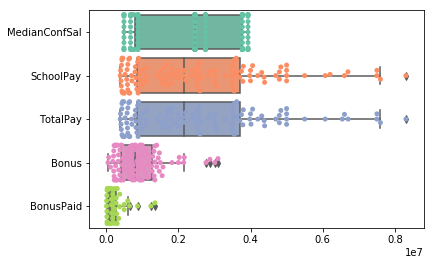

In [7]:
# look at distributions of dataset elements, determin best methods for cleaning the data
# Numeric continuous PayType attributes
payTypes = ['MedianConfSal','SchoolPay','TotalPay','Bonus','BonusPaid']
sns.boxplot(data=coachesDf[payTypes], orient='h',palette='Set2');
sns.swarmplot(data=coachesDf[payTypes], orient='h',palette='Set2');


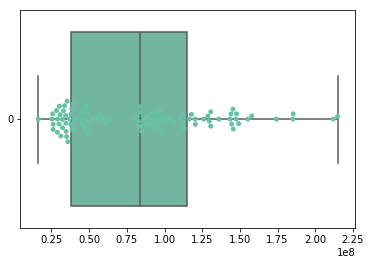

In [8]:
# NCAAFBREV16
sns.boxplot(data=coachesDf['NCAAFBREV16'], orient='h',palette='Set2');
sns.swarmplot(data=coachesDf['NCAAFBREV16'], orient='h',palette='Set2');

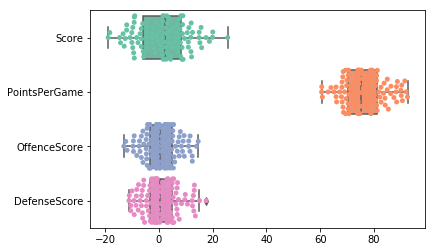

In [9]:
# Score attributes
score = ['Score','PointsPerGame','OffenceScore','DefenseScore']
sns.boxplot(data=coachesDf[score], orient='h',palette='Set2');
sns.swarmplot(data=coachesDf[score], orient='h',palette='Set2');

In [10]:
# find NaN values, determine how to handle them
if isDatasetExp: print("Total Count of NaN in Coaches Dataset: {0}".format(coachesDf.isnull().sum().sum()))
nan_rows = coachesDf[coachesDf.isnull().T.any().T]

if isDatasetExp: print("Rows that contain NaN values in Coaches Dataset: {0}".format(len(nan_rows)));

Total Count of NaN in Coaches Dataset: 187
Rows that contain NaN values in Coaches Dataset: 59


In [11]:
# find which columns have NaN values
def findColumnsNaN():
    for col in list(coachesDf.columns):
        #print(coachesDf[col].isnull().sum().sum())
        if coachesDf[col].isnull().sum().sum() > 0:
            print("Column: {0} has: {1} NaN values".format(col,coachesDf[col].isnull().sum().sum()))
        else:
            print("{0}: No NaN values found".format(col))
#findColumnsNaN()

# Clean Coaches Dataset
Handle NaN values appropriately

In [12]:
# confirm that the missing values are of the same records
def getNaNIndexes(df,att):
    n = np.where(df[att].isnull()==True)
    return list(n[0])

# Pay Type Attributes
print("Pay Type Attributes:")
print("SchoolPay:  {0}".format(getNaNIndexes(coachesDf,'SchoolPay')))
print("TotalPay:   {0}\n".format(getNaNIndexes(coachesDf,'TotalPay')))

# Scoring Type Attributes
print("Scoring Attributes:")
print("W:             {0}".format(getNaNIndexes(coachesDf,'W')))
print("L:             {0}".format(getNaNIndexes(coachesDf,'L')))
print("WLRatio:       {0}".format(getNaNIndexes(coachesDf,'WLRatio')))
print("OffenceScore:  {0}".format(getNaNIndexes(coachesDf,'OffenceScore')))
print("DefenseScore:  {0}".format(getNaNIndexes(coachesDf,'DefenseScore')))
print("Score:         {0}".format(getNaNIndexes(coachesDf,'Score')))
print("PointsPerGame: {0}\n".format(getNaNIndexes(coachesDf,'PointsPerGame')))

Pay Type Attributes:
SchoolPay:  [11, 15, 91, 94, 95]
TotalPay:   [11, 15, 91, 94, 95]

Scoring Attributes:
W:             [14, 18, 23, 48, 49, 56, 57, 61, 82, 90, 91]
L:             [14, 18, 23, 48, 49, 56, 57, 61, 82, 90, 91]
WLRatio:       [14, 18, 23, 48, 49, 56, 57, 61, 82, 90, 91]
OffenceScore:  [14, 18, 23, 48, 49, 56, 57, 61, 82, 90, 91]
DefenseScore:  [14, 18, 23, 48, 49, 56, 57, 61, 82, 90, 91]
Score:         [14, 18, 23, 48, 49, 56, 57, 61, 82, 90, 91]
PointsPerGame: [14, 18, 23, 48, 49, 56, 57, 61, 82, 90, 91]



In [24]:
# get conference median values for the scoring missing attributes
def fillWithConfMedian(df,att):
    rows = getNaNIndexes(df,att)
    for r in rows:
        c = df.iloc[r].Conf
        m = round((np.median(df[df.Conf==c][att].sort_values().dropna())),2)
        df[att].iloc[r] = m
        #print("{0}:{1}".format(att,df[att].iloc[r]))

fillWithConfMedian(coachesDf,'W')
fillWithConfMedian(coachesDf,'L')
fillWithConfMedian(coachesDf,'WLRatio')
fillWithConfMedian(coachesDf,'OffenceScore')
fillWithConfMedian(coachesDf,'DefenseScore')
fillWithConfMedian(coachesDf,'Score')
fillWithConfMedian(coachesDf,'PointsPerGame')

In [14]:
# take the mean value of NCAAFBREV16 and replace the 19 NaN values with it
coachesDf.NCAAFBREV16.fillna((coachesDf.NCAAFBREV16.mean()), inplace=True)

#Bonus & BonusPaid, set to 0 where NaN
coachesDf.Bonus.fillna(0, inplace=True)
coachesDf.BonusPaid.fillna(0, inplace=True)

#Replace SchoolPay & TotalPay NaN values with its MedianConfSal (the NaN's are of the same records)
def fillWithMedicanConfSal(att,vec):
    for i in vec[0]:
        coachesDf[att].iloc[i] = coachesDf.MedianConfSal.iloc[i]

fillWithMedicanConfSal('SchoolPay',np.where(coachesDf['SchoolPay'].isnull()==True))    
fillWithMedicanConfSal('TotalPay',np.where(coachesDf['TotalPay'].isnull()==True))    

# fill the PayPlusBonus2016 missing values with it's TotalPay value, no Bonus or BonusPaid was awarded to these four coaches
ppb = getNaNIndexes(coachesDf,'PayPlusBonus2016')

for i in ppb:
    tp = coachesDf.TotalPay.iloc[i]
    coachesDf.PayPlusBonus2016.iloc[i] = tp


# check that the replacement values were applied
#findColumnsNaN()

In [15]:
print(coachesDf.SchoolPay.head())
print(coachesDf.SchoolPay.describe())

0     885000.0
1     411000.0
2    8307000.0
3     712500.0
4    1600000.0
Name: SchoolPay, dtype: float64
count    1.180000e+02
mean     2.555000e+06
std      1.880688e+06
min      3.900000e+05
25%      8.556440e+05
50%      2.275000e+06
75%      3.738494e+06
max      8.307000e+06
Name: SchoolPay, dtype: float64


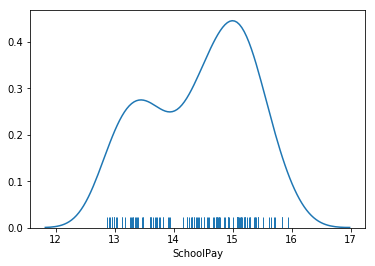

In [16]:
sns.distplot(np.log(coachesDf.SchoolPay.dropna()), hist=False, rug=True);

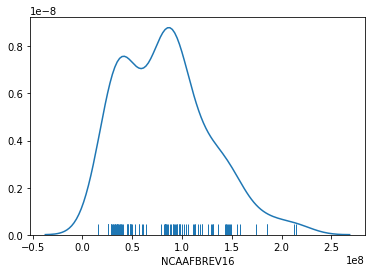

In [17]:
sns.distplot(coachesDf.NCAAFBREV16, hist=False, rug=True)

In [18]:
coachesDf.Conf.value_counts()

ACC         14
Big Ten     14
SEC         14
AAC         12
Mt. West    12
MAC         12
Pac-12      12
Big 12      10
Sun Belt    10
Ind.         6
C-USA        2
Name: Conf, dtype: int64

# Investigate the three primary Conferences
**ACC, Big Ten and Big East**  
    Note: Big East is no longer a football conference. Teams from when Syracuse was a memeber of that conference have been aggregated together to create a mock conference scenario.**

In [566]:

coachesDf[coachesDf.School.isin(bigEastConf2012)]


,School,Conf,Coach,NCAAFBREV16,MedianConfSal,SchoolPay,TotalPay,Bonus,BonusPaid,PayPlusBonus2016,...,TrueRank,W,L,WLRatio,OffenceScore,DefenseScore,Score,PointsPerGame,SCL_UNITID,runiform
21,Cincinnati,AAC,Luke Fickell,6.045820e+07,2458032.5,2000000.0,2000000.0,625000.0,0.0,2000000.0,...,97,4.0,8.0,0.500000,-9.46,0.29,-9.17,65.20,201885,0.615396
26,Connecticut,AAC,Randy Edsall,8.337422e+07,2458032.5,1100000.0,1100000.0,650000.0,129000.0,1229000.0,...,46,3.0,9.0,0.333333,-13.01,-0.30,-13.30,60.84,129020,0.397203
51,Louisville,ACC,Bobby Petrino,1.204453e+08,2458032.5,3980434.0,3980434.0,1472917.0,869917.0,4850351.0,...,54,9.0,4.0,2.250000,8.81,3.06,11.87,92.04,157289,0.607194
82,Pittsburgh,ACC,Pat Narduzzi,8.292182e+07,2458032.5,3017718.0,3017718.0,0.0,0.0,3017718.0,...,20,7.5,5.5,1.380000,1.98,4.44,7.31,77.24,215293,0.918198
84,Rutgers,Big Ten,Chris Ash,9.688303e+07,3775000.0,2200000.0,2200000.0,960000.0,50000.0,2250000.0,...,48,2.0,10.0,0.200000,-9.42,2.45,-6.97,66.15,186380,0.705998
89,South Florida,AAC,Charlie Strong,4.996034e+07,2458032.5,1000000.0,1000000.0,815000.0,70000.0,1070000.0,...,74,11.0,2.0,5.500000,14.00,-6.16,7.83,90.21,137351,0.438310
93,Syracuse,ACC,Dino Babers,8.292182e+07,2458032.5,2401206.0,2401206.0,0.0,0.0,2401206.0,...,49,4.0,8.0,0.500000,0.08,-4.59,-4.51,75.51,196413,0.951429
94,Temple,AAC,Geoff Collins,8.292182e+07,2458032.5,2458032.5,2458032.5,0.0,0.0,2458032.5,...,65,10.0,4.0,2.500000,2.00,6.96,8.97,78.15,216339,0.480359


In [586]:
# get series vectors of the primary three conferences to investigate
# get dataset of big ten conference for comparison
#coachesBigTenConf = coachesDf[coachesDf.Conf == 'Big Ten'];
coachesBigTenConf = coachesDf[coachesDf.School.isin(bigTenConf)];
if isDatasetExp: print(coachesBigTenConf.School)
if isDatasetExp: print("")
# get dataframe of teams in the ACC conf that syracuse is now a member of
coachesACCConf = coachesDf[coachesDf.Conf == 'ACC'];
if isDatasetExp: print(coachesACCConf.School)  
# get dataframe of big east teams when syracuse was in that leage
coaches2012BigEastConf = coachesDf[coachesDf.School.isin(bigEastConf2012)];
if isDatasetExp: print("")
if isDatasetExp: print(coaches2012BigEastConf.School) 


40           Illinois
41            Indiana
42               Iowa
53           Maryland
58           Michigan
59     Michigan State
60          Minnesota
65           Nebraska
73       Northwestern
76         Ohio State
81         Penn State
83             Purdue
84            Rutgers
93           Syracuse
116         Wisconsin
Name: School, dtype: object

13           Boston College
22                  Clemson
27                     Duke
32            Florida State
37             Georgia Tech
51               Louisville
56             Miami (Fla.)
70           North Carolina
71     North Carolina State
82               Pittsburgh
93                 Syracuse
109                Virginia
110           Virginia Tech
111             Wake Forest
Name: School, dtype: object

21       Cincinnati
26      Connecticut
51       Louisville
82       Pittsburgh
84          Rutgers
89    South Florida
93         Syracuse
94           Temple
Name: School, dtype: object


# Obtain the NCAA Graduation Rate Datasets
Available from: [NCAA Research Data](http://www.ncaa.org/about/resources/research/shared-ncaa-research-data)

* This file contains the latest four-cohort Federal Graduation Rate and GSR aggregated at team level.  A team's four-year Federal Graduation Rate or GSR is calculated by adding all numerators during the four-year period, and then dividing that total by the sum of all denominators during the same period.  The four-year rates included in this file are based on the cohorts 2008 through 2011. The rates for a given cohort are reported in the spring immediately after the cohort's sixyear graduation window has expired. Therefore, the four-cohort rates included in this file are based on data collected in the spring of 2018.

In [28]:
# read in the NCAA and National Graduation Rate dataset
gsrDf = pd.read_csv('./data/2018RES_File5-DISquadAggregationSA.csv', error_bad_lines=False)
#print(gsrDf.head())
gsrDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 12 columns):
SCL_UNITID            5403 non-null int64
SCL_NAME              5403 non-null object
SCL_DIVISION          5403 non-null int64
SCL_SUBDIVISION       5403 non-null int64
SCL_CONFERENCE        5403 non-null object
DIV1_FB_CONFERENCE    4005 non-null object
SCL_HBCU              5403 non-null int64
SCL_PRIVATE           5403 non-null int64
SPORT                 5403 non-null object
SPONSORED             5403 non-null int64
FED_RATE              5093 non-null float64
GSR                   5264 non-null float64
dtypes: float64(2), int64(6), object(4)
memory usage: 506.6+ KB


In [640]:
if isDatasetExp: print("NCAA GSR Dataframe Shape: {0}".format(gsrDf.shape))
if isDatasetExp: print("NCAA GSR Dataframe, Number of records: {0}".format(len(gsrDf)))
if isDatasetExp: print("NCAA GSR Dataframe Size: {0}\n".format(gsrDf.size))
if isDatasetExp: print(gsrDf.info())

NCAA GSR Dataframe Shape: (5403, 12)
NCAA GSR Dataframe, Number of records: 5403
NCAA GSR Dataframe Size: 64836

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 12 columns):
SCL_UNITID            5403 non-null int64
SCL_NAME              5403 non-null object
SCL_DIVISION          5403 non-null int64
SCL_SUBDIVISION       5403 non-null int64
SCL_CONFERENCE        5403 non-null object
DIV1_FB_CONFERENCE    4005 non-null object
SCL_HBCU              5403 non-null int64
SCL_PRIVATE           5403 non-null int64
SPORT                 5403 non-null object
SPONSORED             5403 non-null int64
FED_RATE              5093 non-null float64
GSR                   5264 non-null float64
dtypes: float64(2), int64(6), object(4)
memory usage: 506.6+ KB
None


In [29]:
# filter the dataset for football only SPORT: 'MFB = football' 
#gsr_fgr_df.SPORT.unique()
mfbGSR = gsrDf[gsrDf.SPORT == 'MFB']
#if isDatasetExp: print("MFB GSR dataset head: \n{0}\n".format(mfbGSR.head()))
if isDatasetExp: print("MFB GSR dataset, number of records: {0}".format(len(mfbGSR)))

# subset the dataset to these identifiable attributes
cols = ['SCL_UNITID','SCL_NAME','SCL_CONFERENCE','FED_RATE','GSR']
mfbGSR = mfbGSR[cols]


MFB GSR dataset, number of records: 252


In [30]:
#list(mfbGSR.SCL_NAME.unique())

# Link Coaches Dataset to NCAA GSR Dataset

In [65]:
# first make the conference values equal for conditional joins
mfbConf_to_coachesConf = {'Mountain West Conference':'Mt. West','Mid-American Conference':'MAC',
                         'Southeastern Conference':'SEC','Sun Belt Conference':'Sun Belt',
                         'Pac-12 Conference':'Pac-12', 'Big 12 Conference':'Big 12',
                         'Atlantic Coast Conference':'ACC', 'American Athletic Conference':'AAC', 'Conference USA':'C-USA',
                          'Big Ten Conference':'Big Ten'}

independentConfs = ['Patriot League','West Coast Conference','ASUN Conference','Western Athletic Conference', 'Atlantic 10']
mfbConfInd_to_coachesConfInd = {i:'Ind.' for i in independentConfs}
mfbConf_to_coachesConf.update(mfbConfInd_to_coachesConfInd)

mfbGSR['C_CONF'] = mfbGSR['SCL_CONFERENCE'].map(mfbConf_to_coachesConf)
mfbGSR['C_CONF'] = mfbGSR['C_CONF'].fillna('Unknown')
#mfbConf_to_coachesConf

In [66]:
mfbGSR[mfbGSR.C_CONF == 'Unknown'].SCL_CONFERENCE.unique()

array(['Southwestern Athletic Conf.', 'Ohio Valley Conference',
       'Southern Conference', 'Big Sky Conference',
       'Southland Conference', 'Big West Conference',
       'Northeast Conference', 'The Ivy League',
       'Mid-Eastern Athletic Conf.', 'Colonial Athletic Association',
       'Big East Conference', 'Missouri Valley Conference',
       'The Summit League', 'America East Conference',
       'Atlantic 10 Conference', 'Metro Atlantic Athletic Conference',
       'Big South Conference', 'Horizon League'], dtype=object)

In [568]:
#mfbGSR[mfbGSR.SCL_NAME.str.contains('Syracuse')]
coachesDf[coachesDf.School.str.contains('Syracuse')]

,School,Conf,Coach,NCAAFBREV16,MedianConfSal,SchoolPay,TotalPay,Bonus,BonusPaid,PayPlusBonus2016,...,TrueRank,W,L,WLRatio,OffenceScore,DefenseScore,Score,PointsPerGame,SCL_UNITID,runiform
93,Syracuse,ACC,Dino Babers,8.292182e+07,2458032.5,2401206.0,2401206.0,0.0,0.0,2401206.0,...,49,4.0,8.0,0.5,0.08,-4.59,-4.51,75.51,196413,0.951429


In [569]:
mfbGSR[mfbGSR.SCL_NAME.str.contains('Syracuse')]

,SCL_UNITID,SCL_NAME,SCL_CONFERENCE,FED_RATE,GSR,C_CONF
3172,196413,Syracuse University,Atlantic Coast Conference,70.0,85.0,ACC


In [570]:
# add a new column to the coaches dataset that links the NCAA GSR dataset
isPrintWarning = False
schoolConf = coachesDf[['School','Conf']]
#indexMap = []
unitIds = []
for i, row in schoolConf.iterrows():
    try:
        id = mfbGSR[(mfbGSR.SCL_NAME.str.contains(row['School'])) & (mfbGSR.C_CONF == row['Conf'])].SCL_UNITID
        #print(int(id))
        #indexMap.append((i,int(id)))
        unitIds.append(int(id))
    except:
        if isPrintWarning: print("WARNING: School [{0}] Conf [{1}] NOT FOUND, Defaulting id [{2}] to 000000".format(row['School'],row['Conf'],i))
        #indexMap.append((i,000000))
        unitIds.append(int(000000))

coachesDf['SCL_UNITID'] = np.array(unitIds)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [38]:
coachesDf.head()


,School,Conf,Coach,NCAAFBREV16,MedianConfSal,SchoolPay,TotalPay,Bonus,BonusPaid,PayPlusBonus2016,...,ComboRank,TrueRank,W,L,WLRatio,OffenceScore,DefenseScore,Score,PointsPerGame,SCL_UNITID
0,Air Force,Mt. West,Troy Calhoun,59577780.0,879288.0,885000.0,885000.0,247000.0,0.0,885000.0,...,64.666667,67,10.0,3.0,3.333333,4.96,-0.87,4.09,78.16,128328
1,Akron,MAC,Terry Bowden,35331217.0,492413.0,411000.0,412500.0,225000.0,50000.0,462500.0,...,10.666667,129,5.0,7.0,0.714286,-0.40,-6.12,-6.52,72.64,200800
2,Alabama,SEC,Nick Saban,174307419.0,3929800.0,8307000.0,8307000.0,1100000.0,500000.0,8807000.0,...,111.333333,5,14.0,1.0,14.000000,8.01,17.62,25.62,90.38,100751
3,Appalachian State,Sun Belt,Scott Satterfield,35058621.0,675000.0,712500.0,712500.0,295000.0,145000.0,857500.0,...,19.666667,122,10.0,3.0,3.333333,-0.86,9.68,8.83,70.76,197869
4,Arizona,Pac-12,Kevin Sumlin,90976758.0,2752232.5,1600000.0,2000000.0,2025000.0,0.0,2000000.0,...,65.666667,62,3.0,9.0,0.333333,1.01,-5.64,-4.63,74.42,0


# Obtain the NCAA Stadium Capacity Dataset
Available from GithHub: [gboeing/data-visualization](https://github.com/gboeing/data-visualization/blob/master/ncaa-football-stadiums/data/stadiums-geocoded.csv)

In [39]:
#
stadiumCapDf = None
try:
    stadiumCapDf = pd.read_csv("https://raw.githubusercontent.com/gboeing/data-visualization/master/ncaa-football-stadiums/data/stadiums-geocoded.csv", error_bad_lines=False)
except:
    print("***WARNING*** Failed to retrieve NCAA Stadium Capacity Dataset from Github, Defaulting to local version")
    stadiumCapDf = pd.read_csv('./data/stadiums-geocoded.csv')
    
stadiumCapDf.head()

,stadium,city,state,team,conference,capacity,built,expanded,div,latitude,longitude
0,Michigan Stadium,Ann Arbor,MI,Michigan,Big Ten,107601,1927,2015,fbs,42.265869,-83.748726
1,Beaver Stadium,University Park,PA,Penn State,Big Ten,106572,1960,2001,fbs,40.812153,-77.856202
2,Ohio Stadium,Columbus,OH,Ohio State,Big Ten,104944,1922,2014,fbs,40.001686,-83.019728
3,Kyle Field,College Station,TX,Texas A&M,SEC,102733,1927,2015,fbs,30.610098,-96.340729
4,Neyland Stadium,Knoxville,TN,Tennessee,SEC,102455,1921,2010,fbs,35.954734,-83.925333


In [641]:
if isDatasetExp: print("NCAA Stadium Capacity Dataframe Shape: {0}".format(stadiumCapDf.shape))
if isDatasetExp: print("NCAA Stadium Capacity, Number of records: {0}".format(len(stadiumCapDf)))
if isDatasetExp: print("NCAA Stadium Capacity: {0}\n".format(stadiumCapDf.size))
if isDatasetExp: print(stadiumCapDf.info())

NCAA Stadium Capacity Dataframe Shape: (253, 13)
NCAA Stadium Capacity, Number of records: 253
NCAA Stadium Capacity: 3289

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 13 columns):
stadium       253 non-null object
city          253 non-null object
state         253 non-null object
team          253 non-null object
conference    253 non-null object
capacity      253 non-null int64
built         253 non-null int64
expanded      146 non-null object
div           253 non-null object
latitude      253 non-null float64
longitude     253 non-null float64
C_CONF        253 non-null object
SCL_UNITID    253 non-null int64
dtypes: float64(2), int64(3), object(8)
memory usage: 25.8+ KB
None


In [53]:
stadiumCapDf[stadiumCapDf.team.str.contains('Syracuse')]

,stadium,city,state,team,conference,capacity,built,expanded,div,latitude,longitude,C_CONF,SCL_UNITID
63,Carrier Dome,Syracuse,NY,Syracuse,ACC,49250,1980,NaN,fbs,43.036133,-76.13652,ACC,0


In [40]:
stadiumCapDf.conference.unique()

array(['Big Ten', 'SEC', 'Big 12', 'Pac-12', 'ACC', 'Independent',
       'Mountain West', 'American', 'C-USA', 'Sun Belt', 'MAC',
       'Ohio Valley', 'Ivy', 'SWAC', 'MEAC', 'Big Sky', 'CAA', 'Patriot',
       'Southern', 'Missouri Valley', 'Big South', 'Southland', 'Pioneer',
       'Northeast'], dtype=object)

In [41]:
#update NCAA stadium conference values to match coaches dataset
stadiumCapConf_to_coachesConf = {'Mountain West':'Mt. West','Independent':'Ind.',
                         'SEC':'SEC','Sun Belt':'Sun Belt',
                         'Pac-12':'Pac-12', 'Big':'Big 12',
                         'ACC':'ACC', 'Big Ten':'Big Ten'}
stadiumCapDf['C_CONF'] = stadiumCapDf['conference'].map(stadiumCapConf_to_coachesConf)
stadiumCapDf['C_CONF'] = stadiumCapDf['C_CONF'].fillna('Unknown')
#stadiumCapDf['C_CONF']

In [42]:
#list(stadiumCapDf.team.unique())
#list(coachesDf.School.unique())
coachesDf.head()

,School,Conf,Coach,NCAAFBREV16,MedianConfSal,SchoolPay,TotalPay,Bonus,BonusPaid,PayPlusBonus2016,...,ComboRank,TrueRank,W,L,WLRatio,OffenceScore,DefenseScore,Score,PointsPerGame,SCL_UNITID
0,Air Force,Mt. West,Troy Calhoun,59577780.0,879288.0,885000.0,885000.0,247000.0,0.0,885000.0,...,64.666667,67,10.0,3.0,3.333333,4.96,-0.87,4.09,78.16,128328
1,Akron,MAC,Terry Bowden,35331217.0,492413.0,411000.0,412500.0,225000.0,50000.0,462500.0,...,10.666667,129,5.0,7.0,0.714286,-0.40,-6.12,-6.52,72.64,200800
2,Alabama,SEC,Nick Saban,174307419.0,3929800.0,8307000.0,8307000.0,1100000.0,500000.0,8807000.0,...,111.333333,5,14.0,1.0,14.000000,8.01,17.62,25.62,90.38,100751
3,Appalachian State,Sun Belt,Scott Satterfield,35058621.0,675000.0,712500.0,712500.0,295000.0,145000.0,857500.0,...,19.666667,122,10.0,3.0,3.333333,-0.86,9.68,8.83,70.76,197869
4,Arizona,Pac-12,Kevin Sumlin,90976758.0,2752232.5,1600000.0,2000000.0,2025000.0,0.0,2000000.0,...,65.666667,62,3.0,9.0,0.333333,1.01,-5.64,-4.63,74.42,0


In [571]:
# add a new column to the coaches dataset that links the NCAA GSR dataset
isPrintWarning = False
schoolConf = coachesDf[['School','Conf','SCL_UNITID']]
unitIds = []
for i, row in schoolConf.iterrows():
    r = None
    try:
        #s = row['School']
       # c = row['Conf']
        #uid = row['SCL_UNITID']
        #print(s)
        #print(c)
        #print(uid)
        r = stadiumCapDf[(stadiumCapDf.team.str.contains(row['School'])) & (stadiumCapDf.C_CONF == row['Conf'])]
        unitIds.append((i,r.index[0],row['SCL_UNITID']))

    except:
        if isPrintWarning: print("WARNING: School [{0}] Conf [{1}] NOT FOUND, Defaulting id [{2}] to 000000".format(row['School'],row['Conf'],i))
        unitIds.append((i,0,row['SCL_UNITID']))

stadiumCapDf['SCL_UNITID'] = pd.Series([0 for i in range(len(stadiumCapDf.index))])
        
for e in unitIds:
    if e[1] > 0:
        stadiumCapDf['SCL_UNITID'].iloc[e[1]] = e[2]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [573]:
#stadiumCapDf[stadiumCapDf['SCL_UNITID']>0]

In [56]:
#coachesDf[coachesDf.School.str.contains('Syracuse')].StadSize
coachesDf[coachesDf.School.str.contains('Syracuse')].GSR

93    80
Name: GSR, dtype: int64

In [54]:
coachesDf.columns

Index(['School', 'Conf', 'Coach', 'NCAAFBREV16', 'MedianConfSal', 'SchoolPay',
       'TotalPay', 'Bonus', 'BonusPaid', 'PayPlusBonus2016', 'StadSize', 'GSR',
       'SeatRank', 'GSRank', 'ComboRank', 'TrueRank', 'W', 'L', 'WLRatio',
       'OffenceScore', 'DefenseScore', 'Score', 'PointsPerGame', 'SCL_UNITID'],
      dtype='object')

<Figure size 800x400 with 0 Axes>

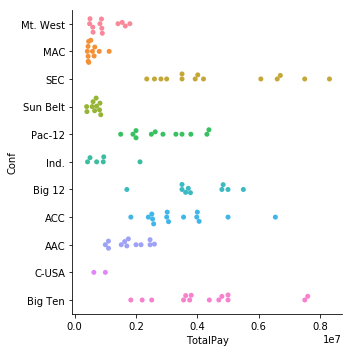

In [241]:
# Look at salary by conferences
# conferences x-axis - y-axis salary

sns.catplot(y='Conf', x='TotalPay', data=coachesDf, orient='h', kind='swarm');

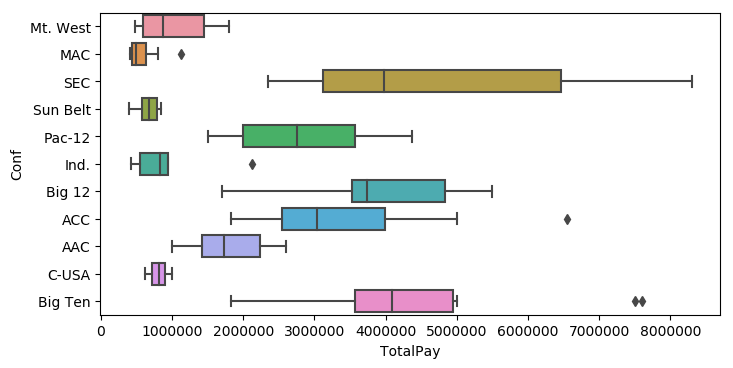

In [244]:
plt.figure(figsize=(8,4), dpi=100)
sns.boxplot(y='Conf', x='TotalPay', data=coachesDf, orient='h');

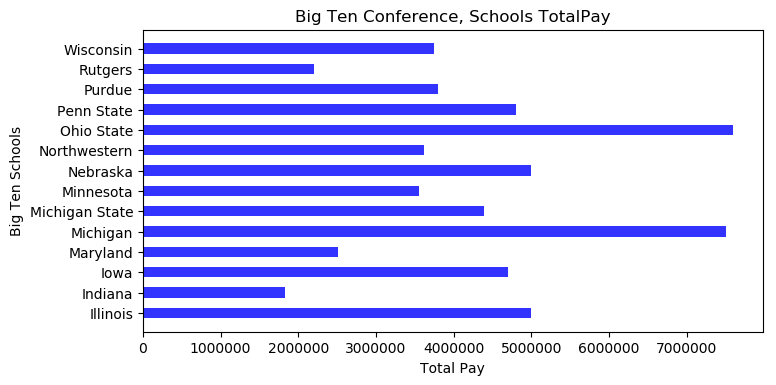

In [246]:
# Big Ten Schools Total Pay comparisons
# Look at salary by conferences and schools
# conferences x-axis - y-axis salary
plt.figure(figsize=(8,4), dpi=100)
index = coachesBigTenConf.School
pay = coachesBigTenConf.TotalPay
bar_width = 0.50
opacity = 0.8
plt.barh(index, pay,
         bar_width, 
         alpha=opacity,
        color='b')
plt.xlabel('Total Pay')
plt.ylabel('Big Ten Schools')
plt.title('Big Ten Conference, Schools TotalPay');


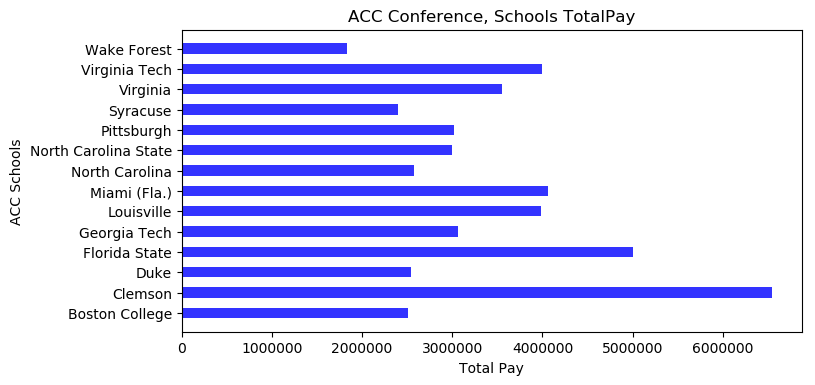

In [245]:
# ACC Schools Total Pay comparison
# Look at salary by conferences and schools
# conferences x-axis - y-axis salary
plt.figure(figsize=(8,4), dpi=100)
index = coachesACCConf.School
pay = coachesACCConf.TotalPay
bar_width = 0.50
opacity = 0.8
plt.barh(index, pay,
         bar_width, 
         alpha=opacity,
        color='b')
plt.xlabel('Total Pay')
plt.ylabel('ACC Schools')
plt.title('ACC Conference, Schools TotalPay');

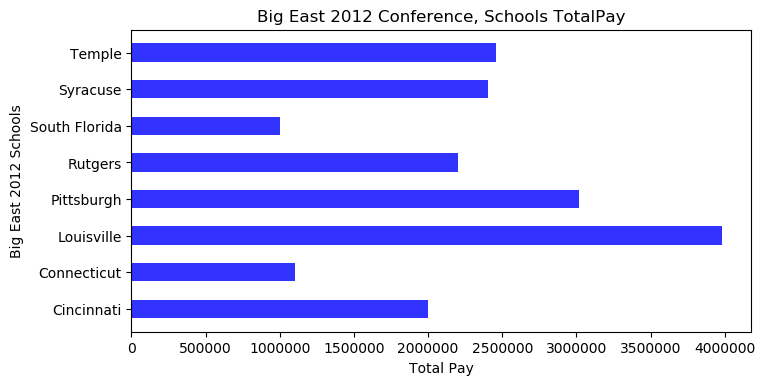

In [248]:
# Big East 2012 Schools Total Pay comparison
# Look at salary by conferences and schools
# conferences x-axis - y-axis salary
plt.figure(figsize=(8,4), dpi=100)
index = coaches2012BigEastConf.School
pay = coaches2012BigEastConf.TotalPay
bar_width = 0.50
opacity = 0.8
plt.barh(index, pay,
         bar_width, 
         alpha=opacity,
        color='b')
plt.xlabel('Total Pay')
plt.ylabel('Big East 2012 Schools')
plt.title('Big East 2012 Conference, Schools TotalPay');

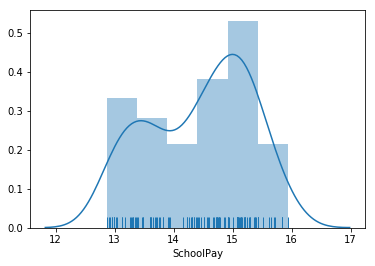

In [107]:
# all conferences
sns.distplot(np.log(coachesDf.SchoolPay.dropna()), rug=True);

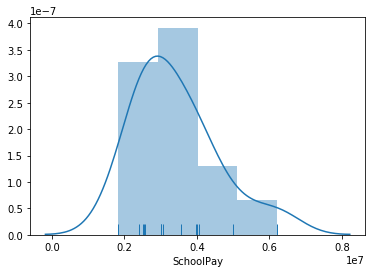

In [116]:
# ACC Conference SchoolPay distribution
sns.distplot((coachesDf[coachesDf['Conf'] == 'ACC']).SchoolPay, rug=True);

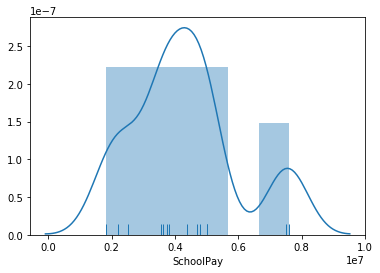

In [119]:
# Big Ten Conference SchoolPay distribution
sns.distplot((coachesDf[coachesDf['Conf'] == 'Big Ten']).SchoolPay, rug=True);

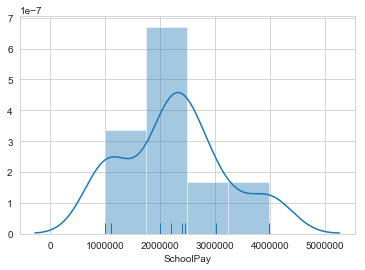

In [639]:
# Big Ten Conference SchoolPay distribution
sns.distplot((coachesDf[coachesDf.School.isin(bigEastConf2012)]).SchoolPay, rug=True);

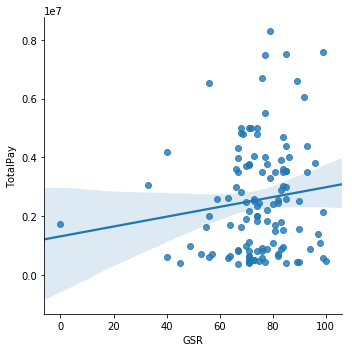

In [82]:
sns.lmplot(x='GSR', y='TotalPay', data=coachesDf);

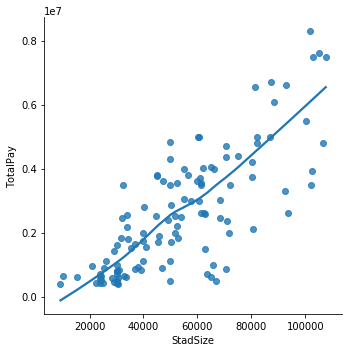

In [95]:
sns.lmplot(x='StadSize', y='TotalPay', data=coachesDf, lowess=True);

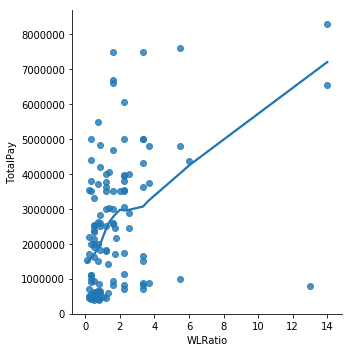

In [94]:
sns.lmplot(x='WLRatio', y='TotalPay', data=coachesDf, lowess=True);

### Trim WLRatio outliers from dataset at 98%, strength of relationship to TotalPay decreases

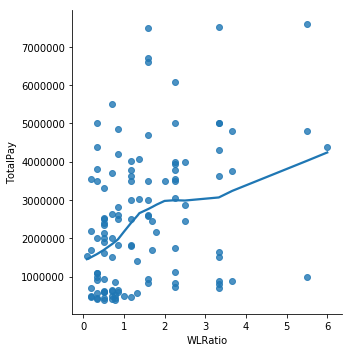

In [212]:
# trim WLRatio outliers from dataset at 98%, strength of relationship to TotalPay decreases
q = coachesDf['WLRatio'].quantile(0.98)
qWLRatio = coachesDf[coachesDf['WLRatio'] < q]
sns.lmplot(x='WLRatio', y='TotalPay', data=qWLRatio, lowess=True);

### Look at the data with outliers removed using zscore normalization

In [215]:
independents = coachesDf[['TotalPay','WLRatio','StadSize','SeatRank','GSR','GSRank','Score','PointsPerGame']]
#independents
zscalledInds = coachesDf[(np.abs(stats.zscore(independents)) < 3 ).all(axis=1)]

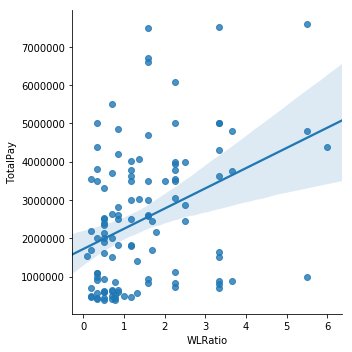

In [216]:
sns.lmplot(x='WLRatio', y='TotalPay', data=zscalledInds);

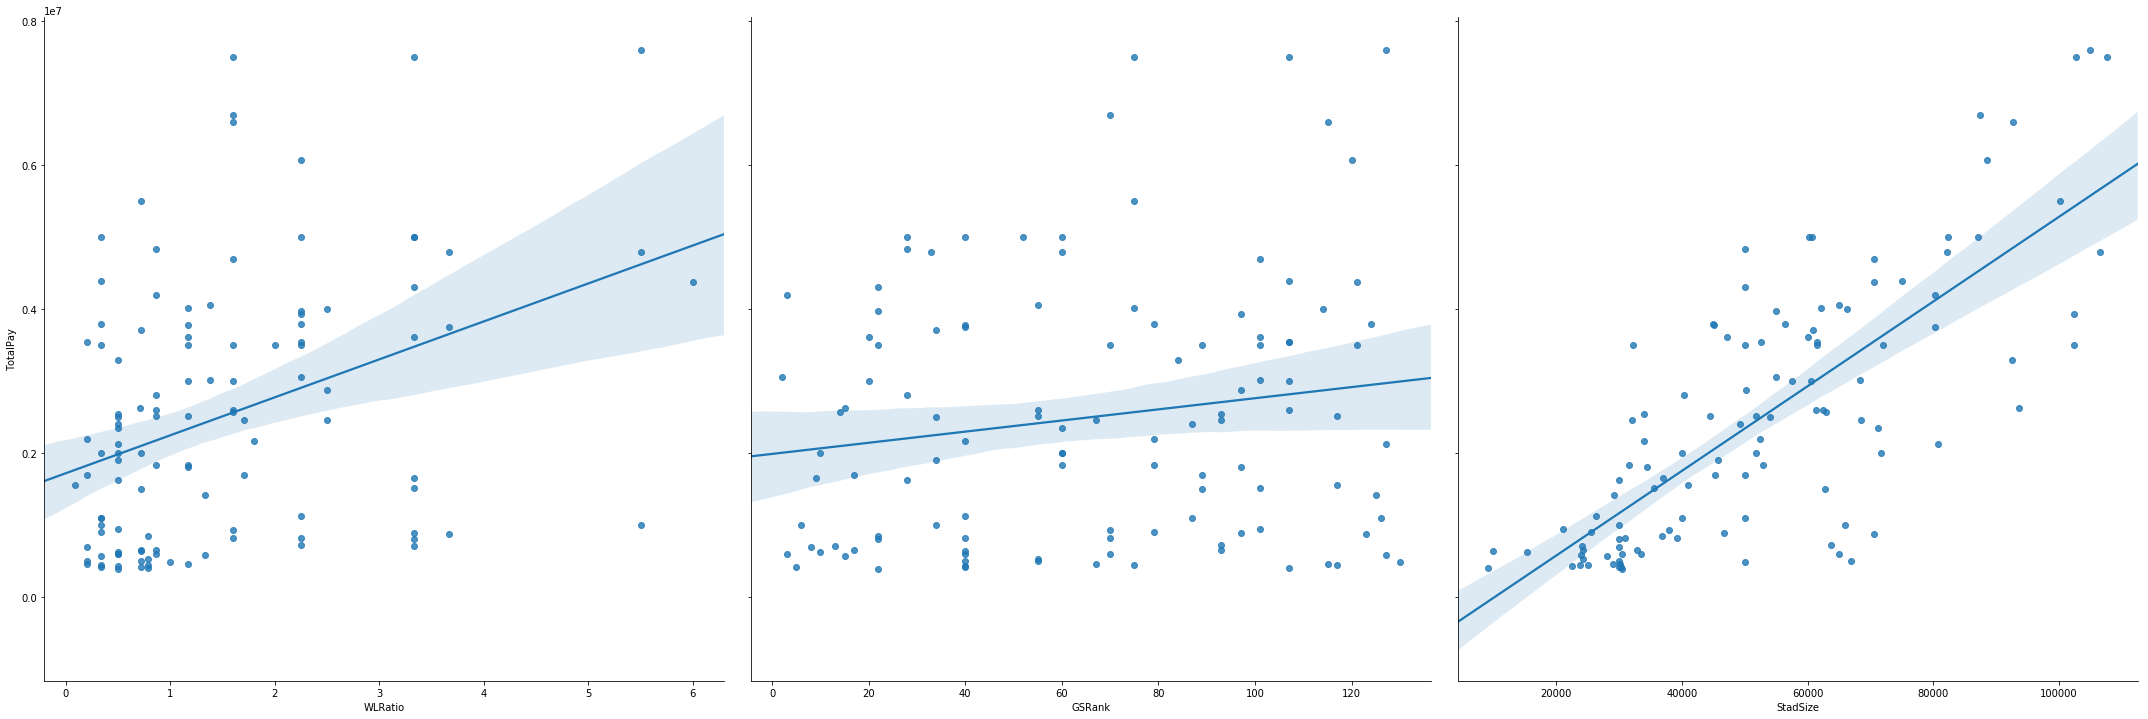

In [219]:
# ['WLRatio','GSRank','StadSize']
sns.pairplot(data=zscalledInds, x_vars=['WLRatio','GSRank','StadSize'], y_vars=['TotalPay'], 
             height=10, kind='reg');

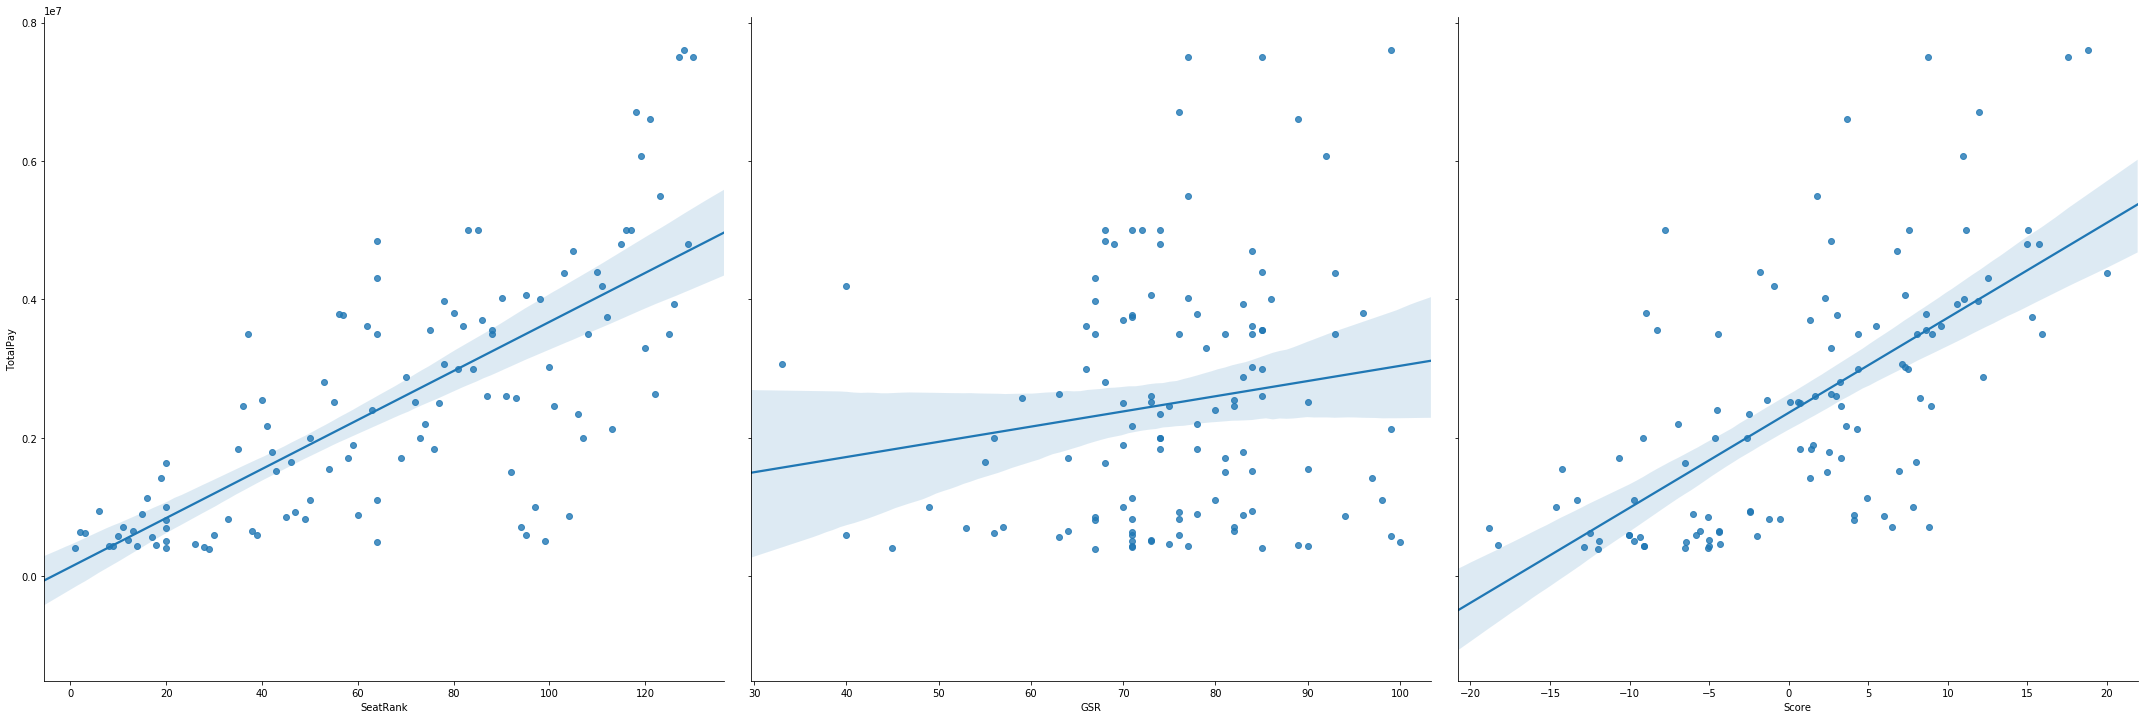

In [220]:
# ['TotalPay','WLRatio','StadSize','SeatRank','GSR','GSRank','Score','PointsPerGame']
sns.pairplot(data=zscalledInds, x_vars=['SeatRank','GSR','Score'], y_vars=['TotalPay'], 
             height=10, kind='reg');

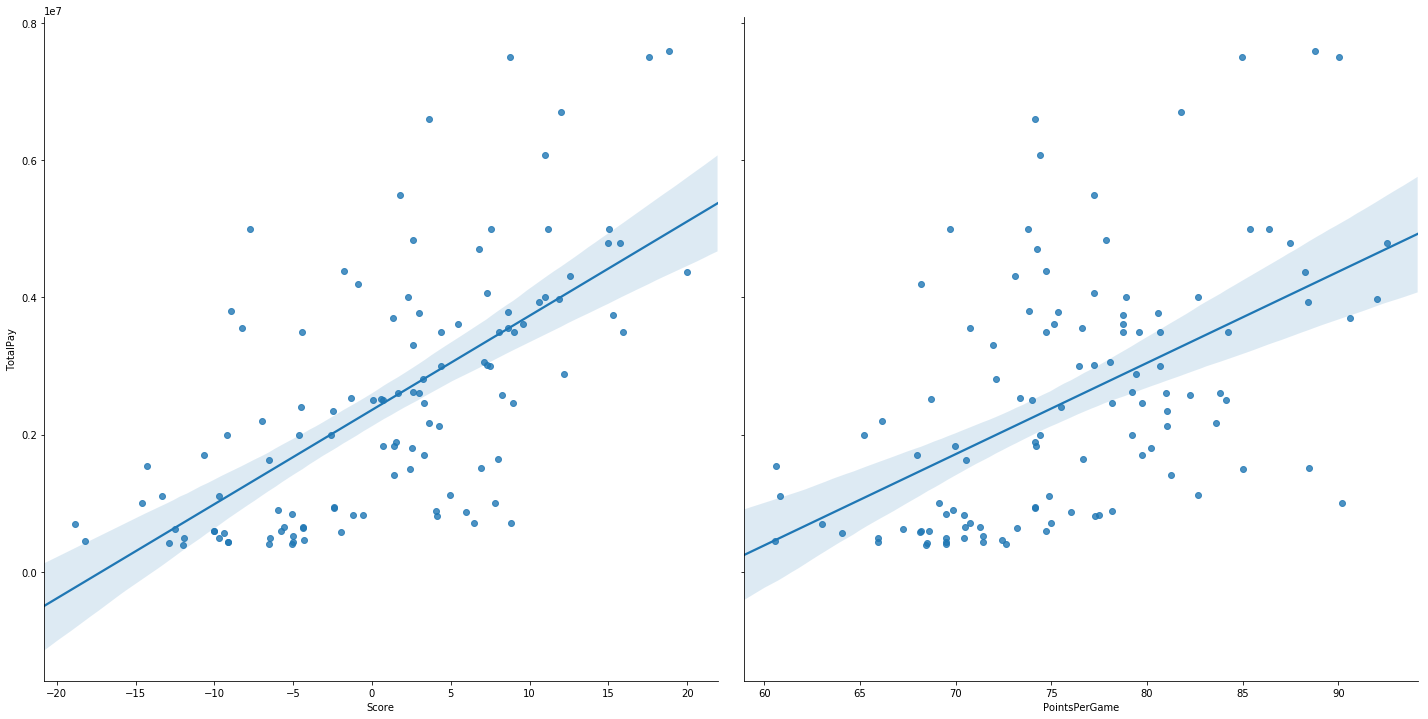

In [221]:
# ['TotalPay','WLRatio','StadSize','SeatRank','GSR','GSRank','Score','PointsPerGame']
sns.pairplot(data=zscalledInds, x_vars=['Score','PointsPerGame'], y_vars=['TotalPay'], 
             height=10, kind='reg');

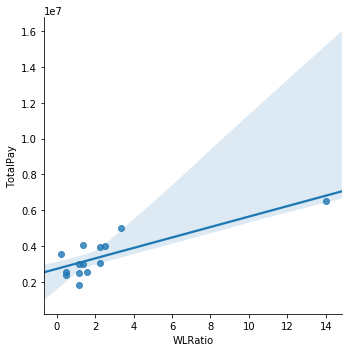

In [93]:
# wlratio for just syracuse
sns.lmplot(x='WLRatio', y='TotalPay', data=coachesDf[coachesDf['Conf'] == 'ACC']);

In [96]:
coachesDf.columns

Index(['School', 'Conf', 'Coach', 'NCAAFBREV16', 'MedianConfSal', 'SchoolPay',
       'TotalPay', 'Bonus', 'BonusPaid', 'PayPlusBonus2016', 'StadSize', 'GSR',
       'SeatRank', 'GSRank', 'ComboRank', 'TrueRank', 'W', 'L', 'WLRatio',
       'OffenceScore', 'DefenseScore', 'Score', 'PointsPerGame', 'SCL_UNITID'],
      dtype='object')

In [ ]:
# total pay by three conf
sns.swarmplot(x='TotalPay', y='')

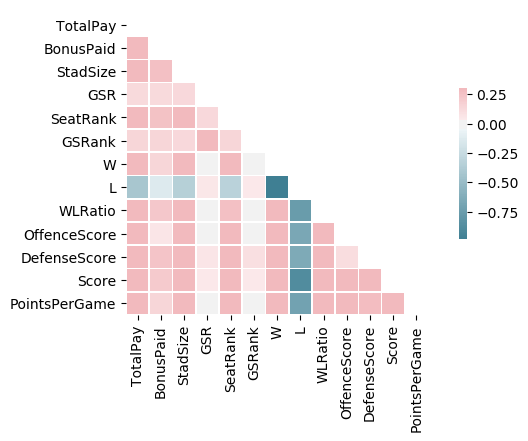

In [252]:
# corr -- non zscore nomralized
cols = ['Conf','School','TotalPay','BonusPaid','StadSize','GSR','SeatRank','GSRank','W','L','WLRatio','OffenceScore','DefenseScore','Score','PointsPerGame']
coachesDf2 = coachesDf[cols]
corr = coachesDf2.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8,4), dpi=100)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(
        corr,
        mask=mask,
        cmap=cmap,
        vmax=.3,
        center=0,
        square=True,
        linewidths=.5,
        cbar_kws={'shrink':.5},
        xticklabels=corr.columns,
        yticklabels=corr.columns
)
plt.show()

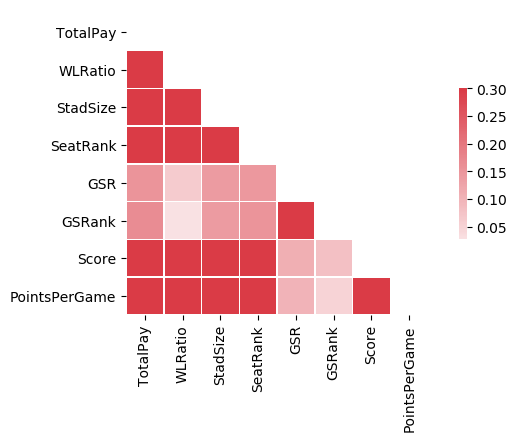

In [251]:
# corr with zscaled attributes
cols = ['TotalPay','WLRatio','StadSize','SeatRank','GSR','GSRank','Score','PointsPerGame']
coachesDf2 = zscalledInds[cols]
corr = coachesDf2.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8,4), dpi=100)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(
        corr,
        mask=mask,
        cmap=cmap,
        vmax=.3,
        center=0,
        square=True,
        linewidths=.5,
        cbar_kws={'shrink':.5},
        xticklabels=corr.columns,
        yticklabels=corr.columns
)
plt.show()


# Modeling

For all records:
    * M4: Proportion of Test Set Variance Accounted for: 0.485
    * M4: Most significant attribute: 'Score' with value: $67,279.0

For the ACC Conference:
    * M4: Proportion of Test Set Variance Accounted for: 0.858
    * M4: Most significant attribute: 'WLRatio' with value: $214,497.0

For the Big Ten Conference:
    * M4: Proportion of Test Set Variance Accounted for: 0.052
    * M4: Most significant attribute: 'WLRatio' with value: $73,876.0

For the Big East Conference:
    * M4: Proportion of Test Set Variance Accounted for: 0.985
    * M4: Most significant attribute: 'Score' with value: $214,301.0

In [548]:
# global variables for Modeling section
isPrintDebug = False

In [629]:

cDf = coachesDf.copy()
# conference datasets
#cDf = coachesACCConf
#cDf = coachesBigTenConf
#cDf = coaches2012BigEastConf


scDf = zscalledInds.copy()
# train-and-split for model validation
np.random.seed(1234)
#testing scaled versus non-scaled
#non-scaled
cDf['runiform'] = uniform.rvs(loc=0, scale=1, size=len(cDf))
coaches_train = cDf[cDf['runiform'] >= 0.33]
coaches_test = cDf[cDf['runiform'] < 0.33]

# apply resampling - try to get better model outcome
rstrain = np.random.choice(coaches_train.shape[0],1000,replace=True)
rstest = np.random.choice(coaches_test.shape[0],1000,replace=True)

coaches_train = coaches_train.iloc[rstrain,:]
coaches_test = coaches_test.iloc[rstest,:]

# validate resampling
#coaches_train[rstrain,:].head()

#scaled
#scDf['runiform'] = uniform.rvs(loc=0, scale=1, size=len(scDf))
#coaches_train = scDf[scDf['runiform'] >= 0.33]
#coaches_test = scDf[scDf['runiform'] < 0.33]

# check training data frame
if isPrintDebug: print("CoachesDf Training Dataframe: {0}".format(coaches_train.shape))
if isPrintDebug: print("CoachesDf Training Dataframe head:\n{0}".format(coaches_train.head()))

# check the test data frame
if isPrintDebug: print("\nCoachesDf Test Dataframe: {0}".format(coaches_test.shape))
if isPrintDebug: print("CoachesDf Test Dataframe head:\n{0}".format(coaches_test.head()))

In [630]:
# models to invistigate
m1 = str('TotalPay ~ WLRatio') #Single Regression
m2 = str('TotalPay ~ BonusPaid + StadSize + GSR + SeatRank + GSRank + W + L + WLRatio + OffenceScore + DefenseScore + Score + PointsPerGame') #Modeled on all attributes
m3 = str('TotalPay ~ WLRatio + StadSize + SeatRank + GSR + GSRank + Score + PointsPerGame') #Modeled on those with the a coorelation relationship

# top three components after running PCA
m4 = str('TotalPay ~ Score + WLRatio + StadSize')

# Single Regression - First Run
Ordinary Least Squars Regression
Feature:
    * Dependent Variable (Response Variable: TotalPay
    * Independent Variable (Explanatory Variable): WLRatio

### M1: Using z-score normalization had a positive effect on model performance:
* Test Set Variance Accounted for raised from 0.06 to: 0.278
* R-squared reduced from 0.242 to: 0.093
* F-statistic changed from 26.17 to: 8.170
* WLRatio coef, P-Value changed from 0.000 to: 0.005

In [631]:
# M1: fit the model to the training set
train_m1_fit = smf.ols(m1,data=coaches_train).fit()
print(train_m1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     326.6
Date:                Sat, 20 Jul 2019   Prob (F-statistic):           2.26e-63
Time:                        19:18:24   Log-Likelihood:                -15764.
No. Observations:                1000   AIC:                         3.153e+04
Df Residuals:                     998   BIC:                         3.154e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.69e+06   7.47e+04     22.625      0.0

In [632]:
# training set predictions from the model fit to the training set
coaches_train['predicted_TotalPay'] = train_m1_fit.fittedvalues
coaches_test['predicted_TotalPay'] = train_m1_fit.predict(coaches_test)

# what is the response variance RMSE, when predicting out-of-sample
rmse = round(np.power(coaches_test['TotalPay'].corr(coaches_test['predicted_TotalPay']),2),3)
print("M1: Proportion of Test Set Variance Accounted for: {0}".format(rmse))

M1: Proportion of Test Set Variance Accounted for: 0.122


# Multiple Regression
Feature Set:
    * M2: BonusPaid + StadSize + GSR + SeatRank + GSRank + W + L + WLRatio + OffenceScore + DefenseScore + Score + PointsPerGame
    * M3: WLRatio + StadSize + SeatRank + GSR + GSRank + Score + PointsPerGame
    * M4: WLRatio + StadSize + GSRank
    
    Best feature Set:
        * Score + WLRatio + StadSize
            * Best Feature:
                * Score

### z-score normalization effects on M2:
* Test Set Variance Accounted from: 0.445 to: 0.748
* R-squared changed from:           0.836 to: 0.713
* Adj. R-squared changed from:      0.809 to: 0.664
* F-statistic changed from:         30.23 to: 14.32
    * Coef P-values changed from:
        * WLRatio from:   0.514 to: 0.123
        * BonusPaid from: 0.010 to: 0.007
        * StadSize from:  0.000 to: 0.040
        * GSR from:       0.490 to: 0.756
        * SeatRank from:  0.078 to: 0.470
        * GSRank from:    0.320 to: 0.979
        * W from:         0.615 to: 0.572
        * L from:         0.394 to: 0.456
        * OffenceScore:   0.378 to: 0.110
        * DefenseScore:   0.675 to: 0.349
        * Score:          0.354 to: 0.117
        * PointsPerGame:  0.015 to: 0.022

In [633]:
# M2: fit the model to the training set
train_m2_fit = smf.ols(m2,data=coaches_train).fit()
print(train_m2_fit.summary())

# which parameter has the most significant effect on TotalPay?
# look at each parameter in the motel
print("\nM2: Most significant attribute: '{0}' with value: {1}".format(train_m2_fit.params[1:].idxmax(),round(train_m2_fit.params[1:].max()),0))


                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     459.0
Date:                Sat, 20 Jul 2019   Prob (F-statistic):               0.00
Time:                        19:18:29   Log-Likelihood:                -14963.
No. Observations:                1000   AIC:                         2.995e+04
Df Residuals:                     987   BIC:                         3.002e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.496e+06    1.3e+06     -5.014

In [634]:
# training set predictions from the model fit to the training set
coaches_train['predicted_TotalPay'] = train_m2_fit.fittedvalues
coaches_test['predicted_TotalPay'] = train_m2_fit.predict(coaches_test)

# what is the response variance RMSE, when predicting out-of-sample
rmse = round(np.power(coaches_test['TotalPay'].corr(coaches_test['predicted_TotalPay']),2),3)
print("M2: Proportion of Test Set Variance Accounted for: {0}".format(rmse))

M2: Proportion of Test Set Variance Accounted for: 0.509


### z-score normalization effects on M3:
* Test Set Variance Accounted from: 0.395 to: 0.815
* R-squared changed from:           0.764 to: 0.644
* Adj. R-squared changed from:      0.743 to: 0.611
* F-statistic changed from:         35.23 to: 19.15
    * Coef P-values changed from:
        * WLRatio from:   0.753 to: 0.028
        * StadSize from:  0.000 to: 0.021
        * GSR from:       0.510 to: 0.589
        * SeatRank from:  0.186 to: 0.460
        * GSRank from:    0.138 to: 0.488
        * Score:          0.020 to: 0.001
        * PointsPerGame:  0.755 to: 0.726

In [635]:
# M3: fit the model to the training set
train_m3_fit = smf.ols(m3,data=coaches_train).fit()
print(train_m3_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     522.0
Date:                Sat, 20 Jul 2019   Prob (F-statistic):               0.00
Time:                        19:18:45   Log-Likelihood:                -15133.
No. Observations:                1000   AIC:                         3.028e+04
Df Residuals:                     992   BIC:                         3.032e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.771e+05   5.56e+05      0.318

In [607]:
# training set predictions from the model fit to the training set
coaches_train['predicted_TotalPay'] = train_m3_fit.fittedvalues
coaches_test['predicted_TotalPay'] = train_m3_fit.predict(coaches_test)

# what is the response variance RMSE, when predicting out-of-sample
rmse = round(np.power(coaches_test['TotalPay'].corr(coaches_test['predicted_TotalPay']),2),3)
print("M3: Proportion of Test Set Variance Accounted for: {0}".format(rmse))

# which parameter has the most significant effect on TotalPay?
# look at each parameter in the motel
print("\nM3: Most significant attribute: '{0}' with value: {1}".format(train_m3_fit.params[1:].idxmax(),round(train_m3_fit.params[1:].max()),0))


M3: Proportion of Test Set Variance Accounted for: 0.763

M3: Most significant attribute: 'PointsPerGame' with value: 193990.0


In [636]:
# M4: fit the model to the training set
train_m4_fit = smf.ols(m4,data=coaches_train).fit()
print(train_m4_fit.summary())

# which parameter has the most significant effect on TotalPay?
# look at each parameter in the motel
#print("\nM4: Most significant attribute: '{0}' with value: {1}".format(train_m4_fit.params[1:].idxmax(),round(train_m4_fit.params[1:].max()),0))


                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     1120.
Date:                Sat, 20 Jul 2019   Prob (F-statistic):          1.66e-318
Time:                        19:18:56   Log-Likelihood:                -15168.
No. Observations:                1000   AIC:                         3.034e+04
Df Residuals:                     996   BIC:                         3.036e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.603e+05    9.2e+04     -1.743      0.0

In [638]:
# training set predictions from the model fit to the training set
coaches_train['predicted_TotalPay'] = train_m4_fit.fittedvalues
coaches_test['predicted_TotalPay'] = train_m4_fit.predict(coaches_test)

# what is the response variance RMSE, when predicting out-of-sample
rmse = round(np.power(coaches_test['TotalPay'].corr(coaches_test['predicted_TotalPay']),2),3)
print("M4: Proportion of Test Set Variance Accounted for: {0}".format(rmse))

# which parameter has the most significant effect on TotalPay?
# look at each parameter in the motel
print("\nM4: Most significant attribute: '{0}' with value: {1}".format(train_m4_fit.params[1:].idxmax(),round(train_m4_fit.params[1:].max()),0))


M4: Proportion of Test Set Variance Accounted for: 0.485

M4: Most significant attribute: 'Score' with value: 67279.0


# Syracuse

Syracuse Coach, TotalPay: \$2,401,206  

* All:  
    * Predicted Pay: \$2,090,379  
* ACC:  
    * Predicted Pay: \$2,727,901  
* Big Ten:  
    * Predicted Pay: \$2,520,168  
* Big East:  
    * Predicted Pay: \$2,451,775  

In [610]:
#coaches_train.loc[:,['School','TotalPay','predicted_TotalPay']]
syr = coaches_test[coaches_test.School=='Syracuse']
syr.predicted_TotalPay[:1]

93    2.451775e+06
Name: predicted_TotalPay, dtype: float64

In [612]:
c = coaches_train.loc[:,['School','TotalPay','predicted_TotalPay']]
c.sort_values(by=['School'], ascending=False)
c[c.School.str.contains('Sy')]

,School,TotalPay,predicted_TotalPay


# PCA Analysis

    * top 3 best components: WLRatio, StadSize, Score

In [370]:
from IPython.display import Image
from IPython.core.display import HTML
from pylab import rcParams
import sklearn
from sklearn import decomposition
from sklearn.decomposition import PCA

In [402]:
# data visualization paramaters
%matplotlib inline
rcParams['figure.figsize'] = 10,6
sns.set_style('whitegrid')

In [394]:
# split data into X
cols1 = ['WLRatio','StadSize','SeatRank','GSR','GSRank','Score','PointsPerGame']
cols2 = ['BonusPaid','StadSize','GSR','SeatRank','GSRank','W','L','WLRatio','OffenceScore','DefenseScore','Score','PointsPerGame']
X = coachesDf.loc[:,['TotalPay']]
Y1 = coachesDf.loc[:,cols1]
Y2 = coachesDf.loc[:,cols2]
variable_names1 = list(Y1.columns)
variable_names2 = list(Y2.columns)


In [418]:
# fit method
pca1 = decomposition.PCA()
pca2 = decomposition.PCA()
outCoachesDf_PCA1 = pca1.fit_transform(Y1)
outCoachesDf_PCA2 = pca2.fit_transform(Y2)
print("Y1 explained variance ratios: \n{0}".format(pca1.explained_variance_ratio_))
print("\nY2 explained variance ratios: \n{0}".format(pca2.explained_variance_ratio_))


Y1 explained variance ratios: 
[9.99996754e-01 2.87182767e-06 1.45496557e-07 1.31784304e-07
 6.97588185e-08 2.22455174e-08 4.53169267e-09]

Y2 explained variance ratios: 
[9.89047714e-01 1.09522467e-02 3.33914133e-08 2.38862651e-09
 1.62762636e-09 9.24113476e-10 7.45977184e-10 6.94663109e-11
 6.23947611e-11 2.45074188e-11 1.91249614e-12 1.38869979e-12]


In [385]:
# tells how much information is compressed into the first few components
# when deciding how many components to keep, look at the percent of cumulative variance
# make sure to retain at least 70%
print("Y1 Cumulative Variance: {0}".format(pca1.explained_variance_ratio_.sum()))
print("\nY2 Cumulative Variance: {0}".format(pca2.explained_variance_ratio_.sum()))


Y1 Cumulative Variance: 1.0000000000000002

Y2 Cumulative Variance: 0.9999999999999996


In [395]:
# top 3 best components: WLRatio, StadSize, GSRank
comps1 = pd.DataFrame(pca1.components_, columns=variable_names1)
comps1

,WLRatio,StadSize,SeatRank,GSR,GSRank,Score,PointsPerGame
0,0.000029,0.999999,0.001546,0.000082,0.000223,0.000220,0.000162
1,0.004775,0.000249,-0.009927,-0.318620,-0.947736,0.007125,0.010250
2,-0.121942,0.001012,-0.500559,0.029821,-0.016313,-0.650141,-0.557433
3,0.116557,0.001184,-0.857554,0.089360,-0.014477,0.414870,0.265900
4,0.013588,0.000141,-0.090475,-0.942109,0.317718,0.044648,-0.033498
5,-0.085175,0.000112,-0.067258,-0.044977,0.019317,-0.607889,0.785046
6,0.981877,-0.000037,0.035099,0.003781,0.001580,-0.183376,-0.032279


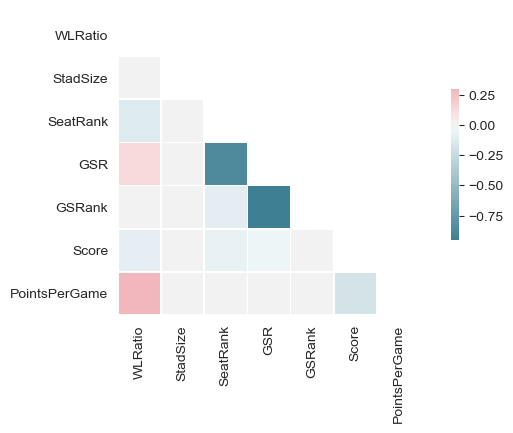

In [412]:
# comp1 of Y1 heatmap
#sns.heatmap(comps1);

#coachesDf2 = zscalledInds[cols]
#corr = coachesDf2.corr()
mask = np.zeros_like(comps1)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8,4), dpi=100)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(
        comps1,
        mask=mask,
        cmap=cmap,
        vmax=.3,
        center=0,
        square=True,
        linewidths=.5,
        cbar_kws={'shrink':.5},
        xticklabels=comps1.columns,
        yticklabels=comps1.columns
)
plt.show()


In [399]:
comps2 = pd.DataFrame(pca2.components_, columns=variable_names2)
comps2

,BonusPaid,StadSize,GSR,SeatRank,GSRank,W,L,WLRatio,OffenceScore,DefenseScore,Score,PointsPerGame
0,9.995760e-01,0.029116,0.000008,0.000045,0.000026,0.000002,-0.000001,0.000002,0.000002,0.000007,0.000009,0.000005
1,-2.911566e-02,0.999575,0.000066,0.001544,0.000171,0.000038,-0.000033,0.000024,0.000109,0.000109,0.000214,0.000161
2,2.217350e-05,0.000193,-0.318999,-0.009735,-0.947443,0.005584,-0.006462,0.005937,0.013328,-0.003154,0.009007,0.010889
3,-2.917485e-06,-0.000447,0.007598,0.087842,0.016622,0.225839,-0.181198,0.133446,0.394548,0.247110,0.647284,0.504576
4,-9.987002e-07,0.001455,0.065600,-0.963446,-0.012656,0.050917,-0.045359,0.053963,-0.081528,0.193090,0.110903,-0.059274
5,-3.436066e-06,-0.000224,-0.627970,0.139206,0.202497,0.068971,-0.048289,0.025840,-0.344392,0.533143,0.191013,-0.313337
6,1.873935e-06,0.000335,-0.706263,-0.207143,0.246515,-0.043793,0.029478,-0.017012,0.275969,-0.448514,-0.170972,0.296453
7,-2.932007e-07,0.000003,-0.000326,0.029193,0.006482,0.516359,-0.377688,0.572337,0.159101,-0.244996,-0.091402,-0.410573
8,-1.496946e-06,-0.000041,0.021811,0.027726,-0.007915,0.038371,-0.009754,0.522479,-0.489240,0.143169,-0.343034,0.588742
9,-4.818244e-07,-0.000021,-0.015743,0.002900,0.005571,-0.535652,0.453028,0.613537,0.213440,0.002764,0.212449,-0.201067


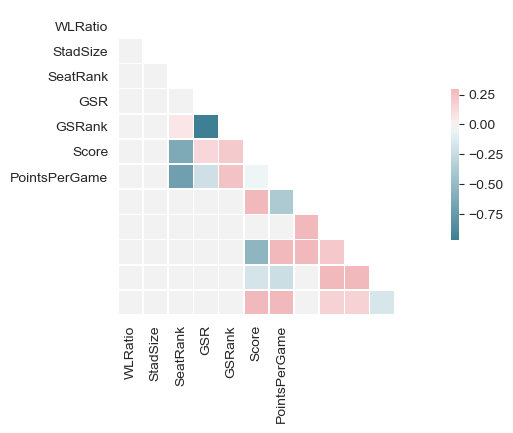

In [413]:
# comp2 of Y2 heatmap
#sns.heatmap(comps2);
mask = np.zeros_like(comps2)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8,4), dpi=100)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(
        comps2,
        mask=mask,
        cmap=cmap,
        vmax=.3,
        center=0,
        square=True,
        linewidths=.5,
        cbar_kws={'shrink':.5},
        xticklabels=comps1.columns,
        yticklabels=comps1.columns
)
plt.show()